# SEO 2

## contents
### 1. Problem formulation and expected result
### 2. Preparation
#### 2.1. Load packages and settings
#### 2.2. Load data
### 3. Data cleaning & Data inspection
### 4. Descriptive data analysis
### 5. Page elements analysis & output


## 1. Problem formulation and expected result
#### To have an optimized web page for SEO, one of the things to do is to make sure if the page has relevent web elements such as good content with a hierarchy (ex. H1, H2..), enough keywords or topic related words... etc. The following analysis will provide an overview of the web elements situation of upslpash webpages that ranked in the position 3 and 4. 

#### P.S. the analysis may be more meaningful for unsplash blogposts, but it is still interesting to see the overview for other pages.

## 2. Preparation
### 2.1.  Load packages and settings

In [111]:
#load packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
from openpyxl import Workbook
from openpyxl.formatting import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle



In [112]:
#set the plot size
sns.set(rc = {'figure.figsize':(12,10)})

In [113]:
#see all columns
pd.set_option('display.max_columns', None)

In [114]:
# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2.2. Load data

In [115]:
# keywords table
keywords = pd.read_csv('/Users/juli/Desktop/python_projects/seo_python/ubersuggest_unsplash_usa_en.csv')
keywords.head()

,No,Keywords,Volume,Position,Est. Visits,Seo Difficulty,Ranking Url
0,1,wallpapers,1830000,2,447456,91,http://unsplash.com/wallpapers
1,2,cool wallpapers,1000000,1,427796,78,http://unsplash.com/wallpapers/cool
2,3,images,1220000,3,405496,94,http://unsplash.com/
3,4,playing ground,2240000,3,405496,78,http://unsplash.com/s/photos/play-ground
4,5,boobs,1220000,3,405496,92,http://unsplash.com/s/photos/boobs


### 3. Data cleansing & Data inspection

In [116]:
#check the amount of rows and columns
keywords.shape

(2000, 7)

In [117]:
for col in keywords:
    print(col)
    print(keywords[col].unique())
    print(len(keywords[col].unique()))
    print('\n')

No
[   1    2    3 ... 1998 1999 2000]
2000


Keywords
['wallpapers' 'cool wallpapers' 'images' ... 'cool pictures'
 'wallpaper computer' 'picture of alien']
2000


Volume
[1830000 1000000 1220000 2240000  673000  550000  450000  823000  368000
  301000  201000  246000  165000   90500  110000  135000   60500   74000
   49500   40500   27100   22200   33100       0   18100   12100   14800
    9900]
28


Position
[2 1 3 4]
4


Est. Visits
[447456 427796 405496 340193 268812 268801 243487 243412 235011 201493
 186502 185118 152722 152647 152572 150201 145512 143826 128680 128678
 128603 107326 107049  86760  86687  86684  86676  84184  80140  71387
  71312  71290  65357  61068  60993  58775  58753  58700  49227  49153
  45612  42266  42025  26167  26166  26091  26016  24628  24537  23856
  23780  22121  22046  22045  21971  21888  21740  21692  21678  21648
  21573  20922  20241  20165  19700  19494  19419  18619  18022  17947
  17946  17896  17871  17818  17743  17742  17740  17667  1766

In [118]:
#check null values and fix them
keywords.isnull().sum()
# there is no null value

No                0
Keywords          0
Volume            0
Position          0
Est. Visits       0
Seo Difficulty    0
Ranking Url       0
dtype: int64

In [119]:
# filter out the keywords that ranked lower than 10
keywords = keywords[keywords['Position'] < 10]


### 4. Descriptive data analysis

Text(0.5, 1.0, 'Ranking distribution - USA English')

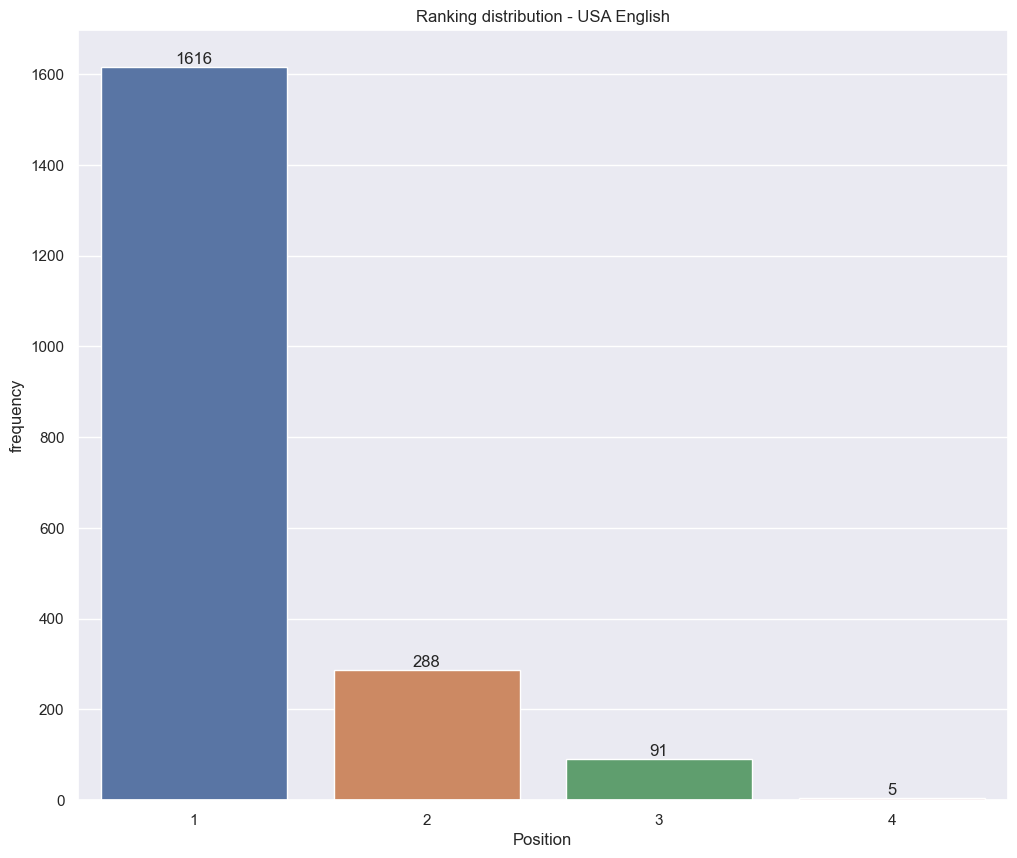

In [120]:
# inspect distribution of the ranking
rank_dis = keywords.groupby(by = "Position").size().reset_index(name="frequency").sort_values(by = "frequency", ascending = False)

ax = sns.barplot(x="Position", y="frequency", data=rank_dis)
ax.bar_label(ax.containers[0])
plt.title("Ranking distribution - USA English")

##### Most of the keywords ranked nr.1, so we can look at the keywords that ranked nr. 2-4 and investigate what is happening on the web pages they are ranked for to see what can be improved so they can also rank nr.1. 

##### Let's check out those keywords' volume first to see if they are important.

In [121]:
vol_dis = keywords[keywords['Position'] > 1][["Keywords","Volume", "Seo Difficulty", "Position"]].sort_values(by="Volume", ascending=False)
vol_dis.head()



,Keywords,Volume,Seo Difficulty,Position
3,playing ground,2240000,78,3
0,wallpapers,1830000,91,2
5,white page,1830000,77,4
4,boobs,1220000,92,3
2,images,1220000,94,3


In [122]:
vol_dis.tail()

,Keywords,Volume,Seo Difficulty,Position
1374,sunset picture,60500,93,2
1358,background beach,60500,89,2
1370,lockscreen wallpapers,49500,86,2
1365,red aesthetic,49500,76,2
1337,lock screen wallpapers,49500,92,2


In [123]:
# check out the average volume and average SEO difficulty of each position
po_vol = vol_dis.groupby("Position")["Volume", "Seo Difficulty"].mean().reset_index()
po_vol

,Position,Volume,Seo Difficulty
0,2,124314.236111,84.076389
1,3,243895.604396,83.065934
2,4,904400.000000,82.600000


##### Despite having the lower SEO difficulties, keywords with the position 3 and 4 have much higher volumes, which could bring higher value. So let's focus on imroving those webpages first.

### 5. Page elements analysis

In [140]:
# keep only the kewords, with which the page ranked 3 and 4
kw34 = keywords[keywords['Position'] > 2]
kw34_list = kw34.values.tolist()


# make the urls key
dict_urls = {}
for urls in kw34_list:
    if urls[6] in dict_urls:
        dict_urls[urls[6]] += [[urls[1],urls[2],urls[3]]]
    else:
        dict_urls[urls[6]] = [[urls[1],urls[2],urls[3]]]

dict_urls


{'http://unsplash.com/': [['images', 1220000, 3]],
 'http://unsplash.com/s/photos/play-ground': [['playing ground', 2240000, 3]],
 'http://unsplash.com/s/photos/boobs': [['boobs', 1220000, 3]],
 'http://unsplash.com/s/photos/white-page': [['white page', 1830000, 4]],
 'http://unsplash.com/wallpapers/cool': [['wallpaper cool', 1000000, 3],
  ['wallpapers cool', 1000000, 3]],
 'http://unsplash.com/wallpapers/cute': [['wallpapers that are cute',
   673000,
   3],
  ['cute wallpapers', 673000, 3],
  ['wallpapers of cute', 673000, 4],
  ['wallpaper of cute', 673000, 4],
  ['cute wallpaper', 673000, 4]],
 'http://unsplash.com/s/photos/cute-wallpaper': [['cutest wallpaper',
   673000,
   3]],
 'http://unsplash.com/backgrounds': [['background', 550000, 3]],
 'http://unsplash.com/s/photos/basketball-court': [['a basketball court',
   550000,
   3]],
 'http://unsplash.com/backgrounds/colors/black': [['black backgrounds',
   301000,
   3],
  ['backgrounds black', 301000, 3]],
 'http://unsplash.co

In [152]:
# web scraping
# function from Daniel Heredia
for key, values in dict_urls.items():
    
    print(str(key))

    res = requests.get(key).text
    soup = BeautifulSoup(res, 'html.parser')

    metatitle = (soup.find('title')).get_text()
    metadescription = soup.find('meta',attrs={'name':'description'})["content"]
    h1 = [a.get_text() for a in soup.find_all('h1')]
    h2 = [a.get_text() for a in soup.find_all('h2')]

    for y in values:
        
        metatitle_occurrence = "True"
        metadescription_occurrence = "True"
        h1_occurrence = "True"
        h2_occurrence = "True"
        
        for z in y[0].split(" "):
        
            if z not in str(metatitle).lower():
                metatitle_occurrence = "False"
 
            if z not in str(metadescription).lower():
                metadescription_occurrence = "False"
 
            if z not in str(h1).lower():
                h1_occurrence = "False"
 
            if z not in str(h2).lower():
                h2_occurrence = "False"

        y.extend([metatitle_occurrence,metadescription_occurrence,h1_occurrence,h2_occurrence])







http://unsplash.com/
http://unsplash.com/s/photos/play-ground
http://unsplash.com/s/photos/boobs
http://unsplash.com/s/photos/white-page
http://unsplash.com/wallpapers/cool
http://unsplash.com/wallpapers/cute
http://unsplash.com/s/photos/cute-wallpaper
http://unsplash.com/backgrounds
http://unsplash.com/s/photos/basketball-court
http://unsplash.com/backgrounds/colors/black
http://unsplash.com/s/photos/aesthetic-wallpaper
http://unsplash.com/s/photos/puppy
http://unsplash.com/s/photos/universal-orlando
http://unsplash.com/s/photos/merry-christmas
http://unsplash.com/s/photos/passport
http://unsplash.com/s/photos/wallpaper-4k
http://unsplash.com/backgrounds/cool
http://unsplash.com/s/photos/hand-tattoo
http://unsplash.com/s/photos/aesthetic
http://unsplash.com/s/photos/star-night
http://unsplash.com/s/photos/opened-door
http://unsplash.com/s/photos/part
http://unsplash.com/s/photos/bamboo
http://unsplash.com/s/photos/cute-cat
http://unsplash.com/s/photos/older-man
http://unsplash.com/s/p

In [153]:
# put into a table 
# function from Daniel Heredia
wb=Workbook()
dest_filename = 'unsplash_seo.xlsx'
ws1 = wb.active

number=2

for key, values in dict_urls.items():
    
    ws1.cell(row=1,column=1).value= "URL"
    ws1.cell(row=1,column=2).value= "Keyword"
    ws1.cell(row=1,column=3).value= "Volume"
    ws1.cell(row=1,column=4).value= "Position"
    ws1.cell(row=1,column=5).value= "Metatitle Occurrence"
    ws1.cell(row=1,column=6).value= "Metadescription Occurrence"
    ws1.cell(row=1,column=7).value= "H1 Occurrence"
    ws1.cell(row=1,column=8).value= "H2 Occurrence"
    
    for list_values in values:
        ws1.cell(row=number,column=1).value= key
        column = 2
        for iteration in list_values:
            ws1.cell(row=number, column=column).value = iteration
            column +=1
        number += 1
    
 
red_text = Font(color="9C0006")
red_fill = PatternFill(bgColor="FFC7CE")
green_text = Font(color="FFFFFF")
green_fill = PatternFill(bgColor="009c48")
 
dxf = DifferentialStyle(font=red_text, fill=red_fill)
dxf2 = DifferentialStyle(font=green_text, fill=green_fill)
 
rule = Rule(type="containsText", operator="containsText", formula=['A1:N' + str(number) + '= "False"'], dxf=dxf)
rule2 = Rule(type="containsText", operator="containsText", formula=['A1:N' + str(number) + '= "True"'], dxf=dxf2)
 
ws1.conditional_formatting.add('A1:N' + str(number), rule)
ws1.conditional_formatting.add('A1:N' + str(number), rule2)
 
 
wb.save(filename = dest_filename)



#### The output of this analysis is an Excel file. 
#### [See which elements for SEO are lost and feel free to give comments >](https://docs.google.com/spreadsheets/d/1chDCIHEJKtmay1H9wW0WTphTh24Ubui-/edit?usp=sharing&ouid=104401980310715243832&rtpof=true&sd=true)